In [3]:
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
# Read the data into a Pandas DataFrame
df = pd.read_csv("consolidated.csv")
df.head(10)

C:\Users\calla\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (2,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DATE,WND_direction,WND_dQC,WND_type,WND_speed,WND_speedQC,SKY_ceiling,SKY_ceilingQC,SKY_ceilingDC,SKY_CAVOK,VIS_distance,VIS_distanceQC,VIS_variability,VIS_variabilityQC,AIR_temp,AIR_tempQC,DEW_temp,DEW_tempQC,SLP_pressure,SLP_pressureQC
0,1/1/2013,80,5,N,88,5,549,5,M,N,4828,5,N,5,280,5,260,5,260,5
1,1/1/2013,90,5,N,57,5,610,5,M,N,6437,5,N,5,278,5,261,5,261,5
2,1/1/2013,90,5,N,62,5,884,5,M,N,6437,5,N,5,280,5,260,5,260,5
3,1/1/2013,70,5,N,77,5,640,5,M,N,4828,5,N,5,280,5,260,5,260,5
4,1/1/2013,80,5,N,82,5,945,5,M,N,16093,5,N,5,283,5,261,5,261,5
5,1/1/2013,70,5,N,82,5,732,5,M,N,16093,5,N,5,290,5,260,5,260,5
6,1/1/2013,80,5,N,82,5,488,5,M,N,16093,5,N,5,290,5,260,5,260,5
7,1/1/2013,70,5,N,82,5,884,5,M,N,16093,5,N,5,290,5,260,5,260,5
8,1/1/2013,80,5,N,77,5,792,5,M,N,16093,5,N,5,289,5,256,5,256,5
9,1/1/2013,90,5,N,72,5,732,5,M,N,16093,5,N,5,290,5,250,5,250,5


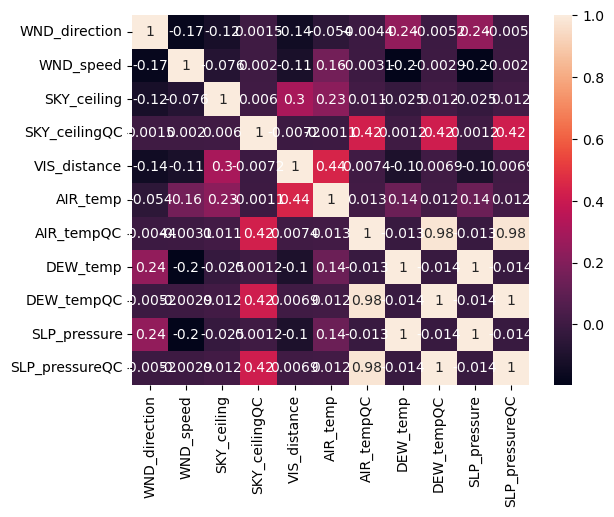

In [6]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [7]:
core_weather = df[["DATE", "WND_speed", "SKY_ceiling", "VIS_distance", "AIR_temp", "DEW_temp", "SLP_pressure"]].copy()
core_weather.columns = ["DT", "WIND", "SKY", "VISI", "AIRT", "DEWPT", "PRESS"]
core_weather

,DT,WIND,SKY,VISI,AIRT,DEWPT,PRESS
0,1/1/2013,88,549,4828,280,260,260
1,1/1/2013,57,610,6437,278,261,261
2,1/1/2013,62,884,6437,280,260,260
3,1/1/2013,77,640,4828,280,260,260
4,1/1/2013,82,945,16093,283,261,261
...,...,...,...,...,...,...,...
55750,4/15/2023,77,22000,16093,310,230,230
55751,4/15/2023,57,22000,16093,280,230,230
55752,4/15/2023,57,1524,16093,280,230,230
55753,4/15/2023,62,1676,16093,272,222,222


In [8]:
df = pd.to_datetime(df.index)
df

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000055745',
               '1970-01-01 00:00:00.000055746',
               '1970-01-01 00:00:00.000055747',
               '1970-01-01 00:00:00.000055748',
               '1970-01-01 00:00:00.000055749',
               '1970-01-01 00:00:00.000055750',
               '1970-01-01 00:00:00.000055751',
               '1970-01-01 00:00:00.000055752',
               '1970-01-01 00:00:00.000055753',
               '1970-01-01 00:00:00.000055754'],
              dtype=

<AxesSubplot:>

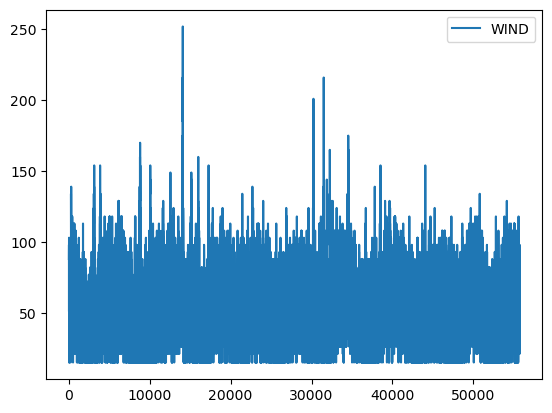

In [9]:
core_weather[["WIND"]].plot()

<AxesSubplot:>

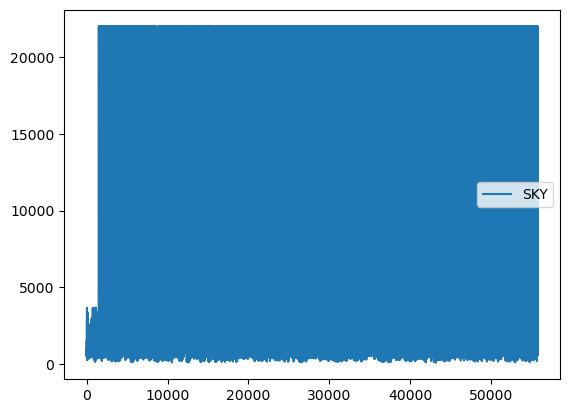

In [10]:
core_weather[["SKY"]].plot()

<AxesSubplot:>

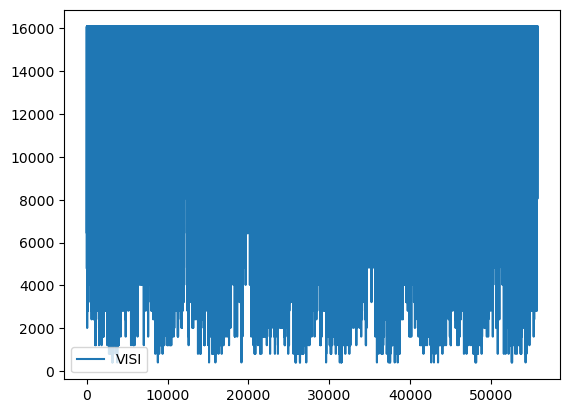

In [11]:
core_weather[["VISI"]].plot()

<AxesSubplot:>

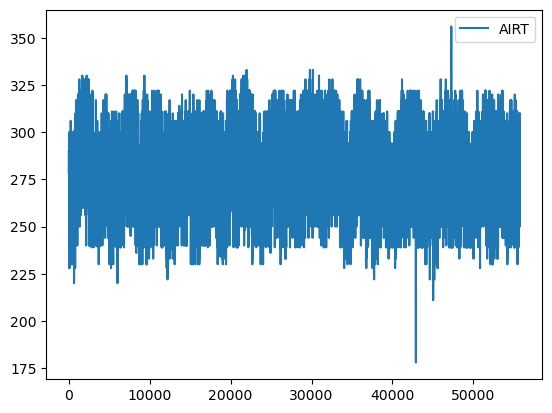

In [12]:
core_weather[["AIRT"]].plot()

<AxesSubplot:>

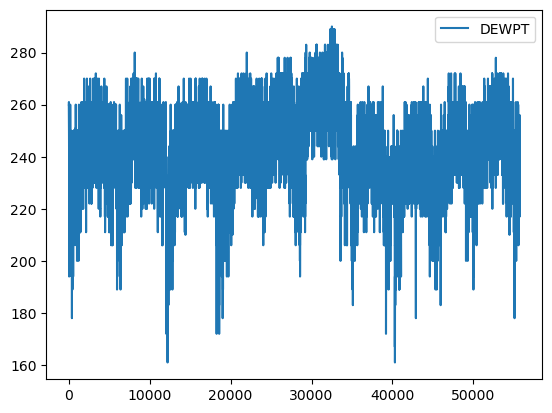

In [13]:
core_weather[["DEWPT"]].plot()

<AxesSubplot:>

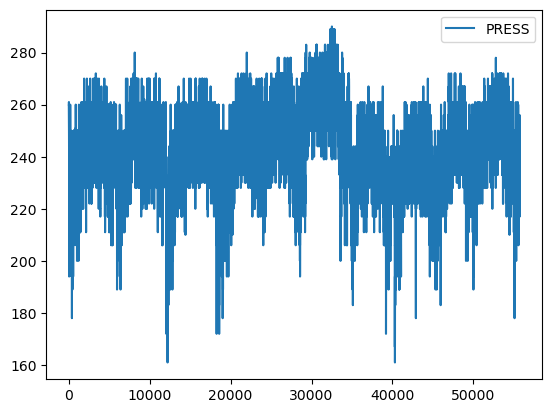

In [14]:
core_weather[["PRESS"]].plot()

<AxesSubplot:>

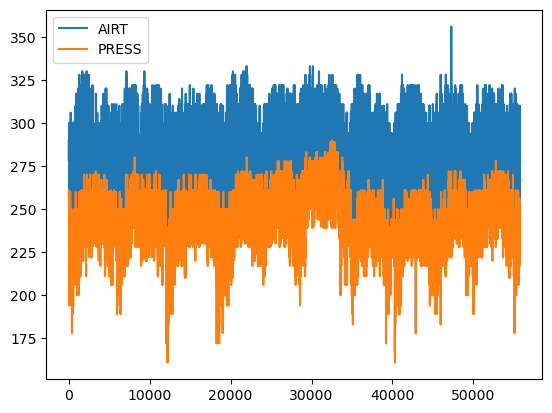

In [15]:
core_weather[["AIRT", "PRESS"]].plot()